### Библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from deeplearn.nnetwork import LinearNeuralNetwork
from deeplearn.layers   import Layer
from deeplearn.loss_functions import MSELoss

### Начальные условия

In [2]:
step = 0.025
low  = 0
high = 6

func_in  = lambda t : np.sin(np.square(t) - 2 * t + 3)
func_out = lambda t : np.sin(np.square(t) - 2 * t) / 4

ts = np.arange(low, high, step)
line_in  = func_in(ts)
line_out = func_out(ts)

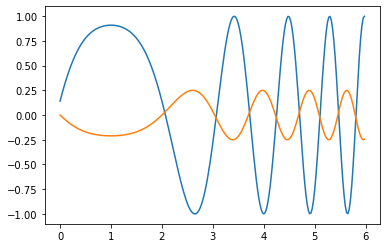

In [3]:
plt.plot(ts, line_in)
plt.plot(ts, line_out)

### Задание 1

In [4]:
nnet = LinearNeuralNetwork()
nnet.configure(epoch=50, learning_rate=0.01, window=5)
nnet.add_layer(Layer(5, 1))
nnet.train(line_in, line_in, loss_func=MSELoss())

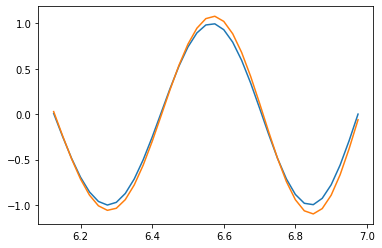

In [5]:
ts2 = np.arange(high, high+1, step)
line_test = func_in(ts2)
preds = nnet.predict(line_test)
plt.plot(ts2[5:], line_test[5:])
plt.plot(ts2[5:], preds)

In [6]:
print(f"{np.square(line_test[5:] - preds).mean():.3%}")

0.422%


### Задание 2

In [13]:
nnet = LinearNeuralNetwork()
nnet.configure(epoch=200, learning_rate=0.01, window=5)
nnet.add_layer(Layer(5, 1))
nnet.train(line_in, line_in, loss_func=MSELoss())

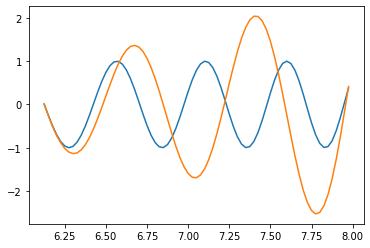

In [17]:
ts2 = np.arange(high, high+2, step)
line_test = func_in(ts2)
preds = nnet.predict(line_test[:10], predict_size=len(line_test) - 5)
#preds = nnet.predict_blindly(line_test, len(line_test[5:]) )
plt.plot(ts2[5:], line_test[5:])
plt.plot(ts2[5:], preds)

In [9]:
print(preds)

[ 0.02604279 -0.21984511 -0.45962644 -0.68247481 -0.87230896 -1.0255773
 -1.13190725 -1.18629937 -1.18394669 -1.12578247 -1.01275744 -0.84980636
 -0.64347632 -0.40339769 -0.14013482  0.13398404  0.40623596  0.66350456
  0.89343823  1.0846219   1.22741907  1.31425262  1.34016922  1.30297706
  1.20348995  1.04546496  0.83552522  0.58284434  0.29878233 -0.00364451
 -0.31033842 -0.6067883  -0.87874229 -1.11289718 -1.29753936 -1.42313082
 -1.48279243 -1.47267455 -1.39218453 -1.24406661 -1.03432158 -0.77197246
 -0.46868142 -0.13823649  0.20407159  0.54215285  0.85987086  1.14180898
  1.37401435  1.54468368  1.64475739  1.66839247  1.61328976  1.48085767
  1.27620235  1.00794173  0.68784994  0.33034607 -0.04815052 -0.42997003
 -0.7970129  -1.13160367 -1.41733771 -1.63988058 -1.78768131 -1.85256434
 -1.83017002 -1.72022057 -1.52659608 -1.257214   -0.92371485 -0.54096612
 -0.12640518  0.30075017  0.72038784]


### Задание 3

In [10]:
nnet = LinearNeuralNetwork()
nnet.configure(epoch=50, learning_rate=0.01, window=5)
nnet.add_layer(Layer(5, 1))
nnet.train(line_in, line_out, loss_func=MSELoss())

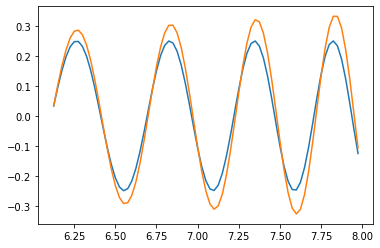

In [11]:
line_test = func_in(ts2)
line_expected = func_out(ts2)

preds = nnet.predict(line_test)
plt.plot(ts2[5:], line_expected[5:])
plt.plot(ts2[5:], preds)

In [12]:
print(f"{np.square(line_expected[5:] - preds).mean():.3%}")

0.257%
